# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Kevin Glory Prasetyo
- **Email:** 71220958@students.ukdw.ac.id
- **ID Dicoding:** vinprsetyo

## Menentukan Pertanyaan Bisnis

- Berapa selisih dan persentase perubahan jumlah penyewaan sepeda dari tahun 2011 s/d 2012
- Pada jam berapa penyewaan sepeda paling sering terjadi pada hari kerja

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Mengload table data hari dan table data jam
hari = "https://raw.githubusercontent.com/Kevin-Glory-Prasetyo/Projek-Data-Analisis-Dicoding/refs/heads/main/day.csv"
jam  = "https://raw.githubusercontent.com/Kevin-Glory-Prasetyo/Projek-Data-Analisis-Dicoding/refs/heads/main/hour.csv"

data_hari = pd.read_csv(hari)
data_hour = pd.read_csv(jam)

# Menampilkan data hari sebanyak 5 baris
data_hari.head()

# Menampilkan data hari sebanyak 5 baris
data_hour.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Di Tahapan gathering data melakukan proses load data csv lalu menampilkan informasi jumlah penyewa sepeda data baik dalam rentang satu hari atau dalam rentang satu jam  

### Assessing Data

In [ ]:
# Menampilakan informasi tipe data dari setiap kolom di table data hari
data_hari.info()
# Menampilakan informasi tipe data dari setiap kolom di table data jam
data_hour.info()
# Menampilkan jumlah missing value di table data hari
data_hari.isna().sum()
# Menampilkan jumlah missing value di table data jam
data_hour.isna().sum()
# Menampilkan jumlah duplikasi di table data hari
print("Jumlah duplikasi: ", data_hari.duplicated().sum())
# Menampilkan jumlah duplikasi di table data jam
print("Jumlah duplikasi: ", data_hour.duplicated().sum())
# menampilkan ringkasan parameter statistik mean,median,max,min,standar deviation,count
data_hour.describe()
# menampilkan ringkasan parameter statistik mean,median,max,min,standar deviation,count
data_hari.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
-  Di Tahap Assessing Data melakukan pengecekan tipe data untuk setiap kolom di data hari dan data jam lalu melakukan pengecekan missing value di data hari dan data jam.Hasilnya tidak ditemukan adanya missing value, tidak ditemukan duplikasi, tidak ditemukan inacurate value dan tidak ditemuka kesalahan tipe data baik di data hari maupun data jam
*  Dapat dilihat bahwa day.csv memiliki 731 entries dan 16 columns
Dan hour.csv memiliki 17379 entries dan 17 columns




### Cleaning Data

In [ ]:
# Memeriksa missing values
print(data_hari.isnull().sum())
print(data_hour.isnull().sum())

# Menghapus atau mengisi missing values jika ada
data_hari.dropna(inplace=True)
data_hour.dropna(inplace=True)


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ada indikasi missing value di table hari maupun table jam sehingga data dapat  dianalisa

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# selisih dan persentase perubahan jumlah penyewaan sepeda dari tahun 2011 s/d 2012
data = data_hour
totalRental_2011 = data[data['yr'] == 0]['cnt'].sum()
totalRental_2012 = data[data['yr'] == 1]['cnt'].sum()
selisihJumlah = totalRental_2012 - totalRental_2011
persentaseKenaikan = (selisihJumlah / totalRental_2011) * 100

print(f"Total penyewaan sepeda di tahun 2011 : {totalRental_2011}")
print(f"Total penyewaan sepeda di tahun 2012 : {totalRental_2012}")
print(f"Selisih total penyewaan sepeda antara tahun 2011 dan 2012: {selisihJumlah}")
print(f"Persentase selisih total penyewaan sepeda antara tahun 2011 dan 2012: {persentaseKenaikan:.2f}%")




# Pada jam berapa penyewaan sepeda paling sering terjadi pada hari kerja
hariKerja = data[data['workingday']==1]
jamTerbanyak = hariKerja.groupby('hr')['cnt'].sum()
jamSewa = jamTerbanyak.idxmax()
jumlahSewa = jamTerbanyak.max()
print(f"Jam terbanyak penyewaan sepeda pada hari kerja adalah jam {jamSewa}:00 dengan jumlah penyewa {jumlahSewa}.")

Total penyewaan sepeda di tahun 2011 : 1243103
Total penyewaan sepeda di tahun 2012 : 2049576
Selisih total penyewaan sepeda antara tahun 2011 dan 2012: 806473
Persentase selisih total penyewaan sepeda antara tahun 2011 dan 2012: 64.88%
Jam terbanyak penyewaan sepeda pada hari kerja adalah jam 17:00 dengan jumlah penyewa 262120.


**Insight:**
- Hasis analisis data peningkatan jumlah sewa sepeda dari tahun 2011 s/d 2012 mengalami peningkatan sebesar 65.88%
- fruekuensi sewa sepeda tertinggi ada di jam 17:00 sebanyak 262120.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

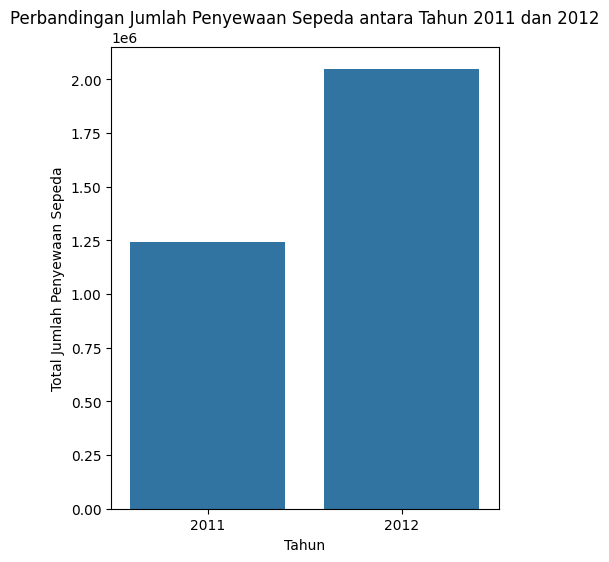

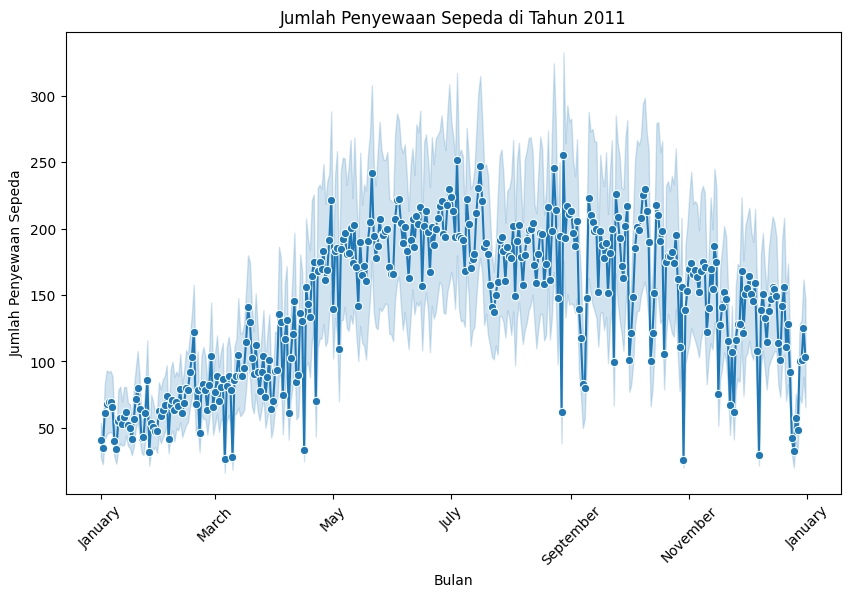

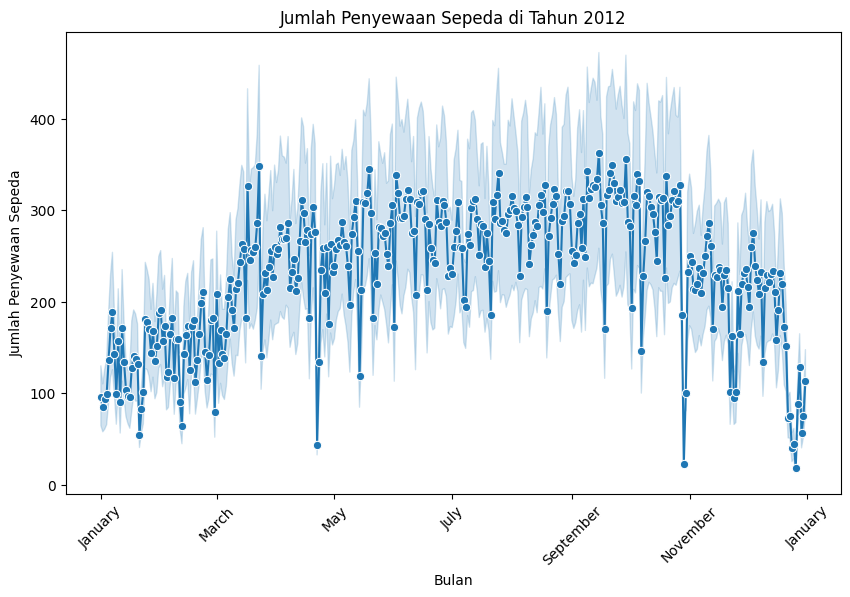

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

data['dteday'] = pd.to_datetime(data['dteday'])

# Visualisasi Perbandingan Penyewaan Sepeda 2011 vs 2012
rentalTahun = data.groupby('yr')['cnt'].sum().reset_index()
rentalTahun['yr'] = rentalTahun['yr'].map({0: '2011', 1: '2012'})
plt.figure(figsize=(5, 6))
sns.barplot(x='yr', y='cnt', data=rentalTahun)
plt.title('Perbandingan Jumlah Penyewaan Sepeda antara Tahun 2011 dan 2012')
plt.xlabel('Tahun')
plt.ylabel('Total Jumlah Penyewaan Sepeda')
plt.show()

print()
print()

# Visualisasi untuk Tahun 2011
data2011 = data[data['yr'] == 0]
plt.figure(figsize=(10, 6))
sns.lineplot(x='dteday', y='cnt', data=data2011, marker='o')
plt.title('Jumlah Penyewaan Sepeda di Tahun 2011')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
# Format sumbu X menjadi nama bulan (Januari s/d Desember)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
# Atur rotasi label sumbu X agar tulisan bulan mendapatkan space
plt.xticks(rotation=45)
plt.show()

print()
print()

# Visualisasi untuk Tahun 2012
data2011 = data[data['yr'] == 1]
plt.figure(figsize=(10, 6))
sns.lineplot(x='dteday', y='cnt', data=data2011, marker='o')
plt.title('Jumlah Penyewaan Sepeda di Tahun 2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
# Format sumbu X menjadi nama bulan (Januari s/d Desember)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
# Atur rotasi label sumbu X agar tulisan bulan mendapatkan space
plt.xticks(rotation=45)
plt.show()



### Pertanyaan 2:

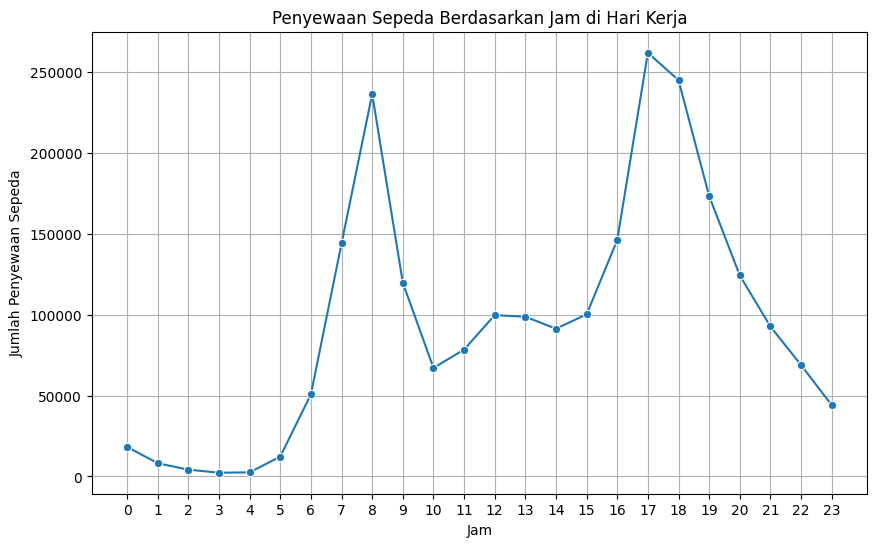

In [ ]:
hariKerja = data[data['workingday'] == 1]
rentalJam = hariKerja.groupby('hr')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=rentalJam, marker='o')
plt.title('Penyewaan Sepeda Berdasarkan Jam di Hari Kerja')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=range(0, 24), labels=[f"{i}" for i in range(24)])
plt.grid(True)
plt.show()

**Insight:**
- Di Tahun 2012 pemimnjaman sepeda naik sebesar 64.88% dibandingkan dengan tahun 2021 dan mengalami kenaikan dari januari hingga september di tahun 2012
* penyewaan sepeda mengalami kenaikan yang cukup signifikan saat jam 15.00 s/d 19.00



## Analisis Lanjutan (Opsional)

## Conclusion

- Pada tahun 2012, jumlah penyewaan sepeda mengalami peningkatan yang signifikan dibandingkan tahun 2011. Total penyewaan sepeda pada tahun 2011 tercatat sebanyak 1.243.103, sementara pada tahun 2012 meningkat menjadi 2.049.576, dengan selisih peningkatan sebanyak 806.473 penyewaan, atau setara dengan kenaikan sebesar 64,88%.
- Selain itu, pada hari kerja, jam dengan penyewaan sepeda terbanyak terjadi pada jam 17:00, dengan total 262.120 penyewaan. Ini menunjukkan bahwa jam setelah jam kerja kemungkinan besar menjadi waktu puncak bagi orang-orang yang menggunakan layanan penyewaan sepeda, mungkin untuk pulang kerja atau beraktivitas lainnya.
*   Peningkatan signifikan dalam jumlah penyewaan dan pola penggunaan sepeda di waktu orang pulang dari tempat kerja  ini mengindikasikan bahwa layanan sepeda semakin populer dan mungkin menjadi solusi transportasi yang lebih diandalkan di kota.


